In [477]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
%matplotlib inline

In [478]:
df=pd.read_csv('E:/ml/regression.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [479]:
df.shape

(3479, 8)

In [480]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [481]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [482]:
df['Area']=df['Area'].apply(lambda X:int(X.replace(',','')))

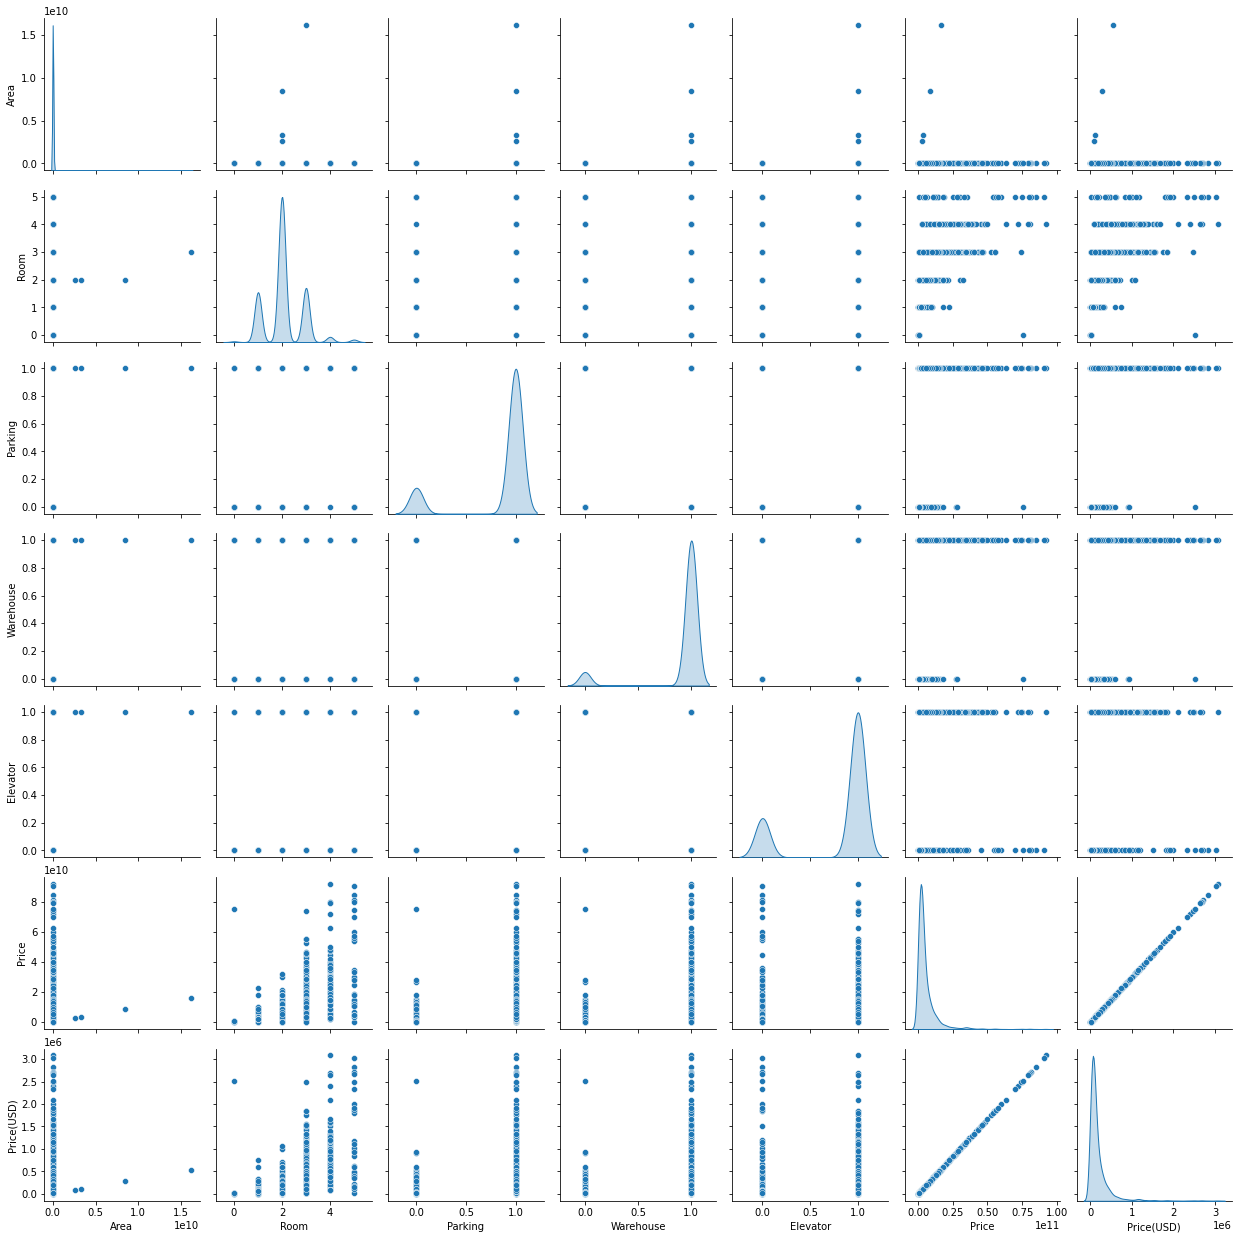

In [483]:
sns.pairplot(df,diag_kind='kde')

<AxesSubplot:>

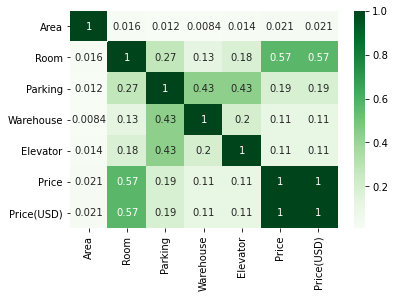

In [484]:
sns.heatmap(df.corr(),annot=True,cmap='Greens')

In [485]:
df.isnull()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
3474,False,False,False,False,False,False,False,False
3475,False,False,False,False,False,False,False,False
3476,False,False,False,False,False,False,False,False
3477,False,False,False,False,False,False,False,False


In [486]:
df.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

<AxesSubplot:>

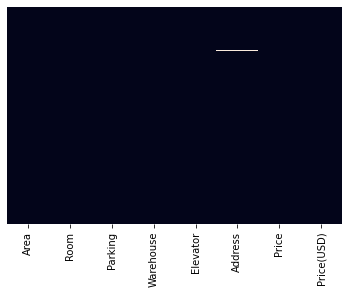

In [487]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [488]:
def missing_percent(df):
    nan_percent = 100*(df.isnull().sum()/len(df))
    nan_percent = nan_percent[nan_percent>0].sort_values()
    return nan_percent

In [489]:
nan_percent=missing_percent(df)

In [490]:
nan_percent

Address    0.66111
dtype: float64

In [491]:
nan_percent[nan_percent<1]

Address    0.66111
dtype: float64

In [492]:
nan_percent[nan_percent<1].index

Index(['Address'], dtype='object')

In [493]:
df[df['Address'].isnull()]

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
43,60,2,True,True,True,NaN,2.650000e+09,88333.33
662,85,2,True,True,True,NaN,1.955000e+09,65166.67
706,117,2,True,True,True,NaN,6.500000e+09,216666.67
1108,77,2,True,True,False,NaN,2.020000e+09,67333.33
1109,71,1,True,True,True,NaN,2.300000e+09,76666.67
1577,100,2,True,True,True,NaN,3.100000e+09,103333.33
1796,70,2,True,True,True,NaN,4.830000e+09,161000.00
2071,94,2,True,True,True,NaN,3.000000e+09,100000.00
2072,99,2,True,True,True,NaN,4.150000e+09,138333.33
2127,63,1,True,True,False,NaN,7.300000e+08,24333.33


In [494]:
df['Address']=df['Address'].fillna(0)

In [495]:
df.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

In [496]:
df['Address'].isnull().sum()

0

In [497]:
df['Area']=df['Area'].astype(int)

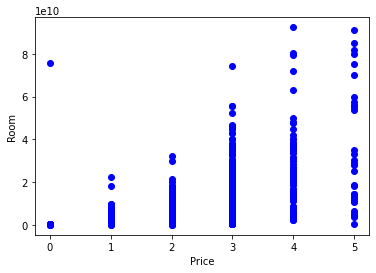

In [498]:
plt.scatter(cdf.Room,cdf.Price,color='blue')
plt.xlabel("Price")
plt.ylabel("Room")
plt.show()

In [499]:
df2 = pd.get_dummies(df['Address'])
df = pd.concat([df2,df],axis=1)
df = df.drop('Address',axis=1)

In [500]:
msk = np.random.rand(len(df))<0.8
train = df[msk]
test = df[~msk]

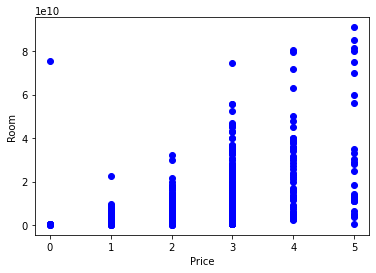

In [501]:
plt.scatter(train.Room , train.Price,color = 'blue')
plt.xlabel("Price")
plt.ylabel("Room")
plt.show()

In [502]:
regr = linear_model.LinearRegression()
x = train.drop('Price',axis = 1)
y = train[['Price']]
# x =x.apply(pd.to_numeric,errors ='coerce')
# y =y.apply(pd.to_numeric,errors = 'coerce')
regr.fit(x,y)
print('coefficients:',regr.coef_)

coefficients: [[ 1.31570748e+01  1.93626290e+01  1.00316254e+02  3.34898246e+01
   4.15350897e+01  5.59855646e+01 -9.53806958e+01  5.41955425e+01
  -2.62122886e+01 -3.43591505e+00  9.81533282e+01  1.38616767e+00
   5.35160822e+01 -2.51271747e+01 -8.00066083e+00 -2.44620555e+00
   1.49863618e+01 -5.10570454e+00  1.15175889e+02  2.23323462e+01
  -1.76728742e+01 -7.70003773e-07 -3.07117001e+01  9.11578184e+00
  -9.37398320e+01  1.00167406e+00 -4.55352078e-06  6.91125452e+00
   1.36625926e+01  9.11578875e+00  1.04221242e+00 -5.24358187e+01
   2.78934650e+01 -2.00161804e-01 -9.94066777e+01 -9.97089589e+01
  -4.85454253e+01 -3.16338579e+01  3.42382403e+01 -2.01306306e-06
  -2.17393090e+01  3.37084384e+00  2.20477717e+00  5.97334349e+01
  -2.42996074e+01  1.18866808e+01 -9.21226475e+01  9.63386373e+01
  -7.39809568e-01 -1.81182293e+01 -5.05942274e+01  8.29957763e+00
   5.37181950e+01 -2.03009795e+01 -1.01750941e+02 -1.82148920e+00
   8.56571486e+01 -5.65414921e-01 -6.11983822e+00  1.01162622e

In [503]:
y_hat = regr.predict(test.drop('Price',axis=1))

In [506]:

print(mean_squared_error(y_hat,test['Price']))
print(r2_score(y_hat,test['Price']))

6784.1616105000085
0.9999999999999999
